In [335]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [111]:
matches_england = pd.read_json("C:\\Users\\gabri\\Desktop\\ADM - Homework 2\\Data\\matches\\matches_England.json")
players = pd.read_json("C:\\Users\\gabri\\Desktop\\ADM - Homework 2\\Data\\players.json")
teams = pd.read_json("C:\\Users\\gabri\\Desktop\\ADM - Homework 2\\Data\\teams.json")

## Getting all players with ages and relative teams

In [288]:
players_team = pd.merge(players, teams, left_on ="currentTeamId", right_on = "wyId")


In [289]:
players_team1 = players_team[['birthDate', 'shortName', 'area', 'name', 'type' ]]
players_team1.head()

,birthDate,shortName,area,name,type
0,1999-01-23,M. Sarr,"{'name': 'France', 'id': '250', 'alpha3code': ...",Nice,club
1,1996-04-11,P. Burner,"{'name': 'France', 'id': '250', 'alpha3code': ...",Nice,club
2,1991-07-19,J. Seri,"{'name': 'France', 'id': '250', 'alpha3code': ...",Nice,club
3,1995-09-07,Marlon,"{'name': 'France', 'id': '250', 'alpha3code': ...",Nice,club
4,1997-09-22,R. Perraud,"{'name': 'France', 'id': '250', 'alpha3code': ...",Nice,club


In [290]:
# We need to consider only the premier league's teams

for i in range(len(players_team1["area"])):
    
    if (players_team1["area"][i]["name"] != "England" and players_team1["area"][i]["name"] != "Wales") or players_team1["type"][i] != "club":
        players_team1.drop([i], axis = 0, inplace=True)
players_team1.head()

,birthDate,shortName,area,name,type
139,1989-03-02,T. Alderweireld,"{'name': 'England', 'id': '0', 'alpha3code': '...",Tottenham Hotspur,club
140,1987-04-24,J. Vertonghen,"{'name': 'England', 'id': '0', 'alpha3code': '...",Tottenham Hotspur,club
141,1992-02-14,C. Eriksen,"{'name': 'England', 'id': '0', 'alpha3code': '...",Tottenham Hotspur,club
142,1990-07-02,D. Rose,"{'name': 'England', 'id': '0', 'alpha3code': '...",Tottenham Hotspur,club
143,1993-07-28,H. Kane,"{'name': 'England', 'id': '0', 'alpha3code': '...",Tottenham Hotspur,club


In [291]:
players_team1.reset_index(drop=True,inplace=True) # getting a new index for the data
players_team1['age'] = [2019-int(players_team1['birthDate'][i][0:4]) for i in range(players_team1.shape[0])] # adding column age for each coach
players_team2 = players_team1[['shortName','age','name']]
players_team2.head()

,shortName,age,name
0,T. Alderweireld,30,Tottenham Hotspur
1,J. Vertonghen,32,Tottenham Hotspur
2,C. Eriksen,27,Tottenham Hotspur
3,D. Rose,29,Tottenham Hotspur
4,H. Kane,26,Tottenham Hotspur


## Getting all teams and relative final score

In [292]:
interestofdata=matches_england[["gameweek","winner","label"]]
interestofdata.head()

,gameweek,winner,label
0,38,1659,"Burnley - AFC Bournemouth, 1 - 2"
1,38,1628,"Crystal Palace - West Bromwich Albion, 2 - 0"
2,38,1609,"Huddersfield Town - Arsenal, 0 - 1"
3,38,1612,"Liverpool - Brighton & Hove Albion, 4 - 0"
4,38,1611,"Manchester United - Watford, 1 - 0"


In [293]:
#Here we just seperate the team name from each other 
x=[]
for i in range(interestofdata.shape[0]):
    x.append([interestofdata["label"].str.split(",")[i][0].split("-")[0],interestofdata["label"].str.split(",")[i][0].split("-")[1]])
x[:10]

[['Burnley ', ' AFC Bournemouth'],
 ['Crystal Palace ', ' West Bromwich Albion'],
 ['Huddersfield Town ', ' Arsenal'],
 ['Liverpool ', ' Brighton & Hove Albion'],
 ['Manchester United ', ' Watford'],
 ['Newcastle United ', ' Chelsea'],
 ['Southampton ', ' Manchester City'],
 ['Swansea City ', ' Stoke City'],
 ['Tottenham Hotspur ', ' Leicester City'],
 ['West Ham United ', ' Everton']]

In [294]:
# New data frame with Home - Away teams seperated
x=pd.DataFrame(x)
x.columns=["team1name","team2name"]
interestofdata=pd.concat([x,interestofdata],axis=1)
interestofdata
interestofdata.drop("label",axis=1,inplace=True)
interestofdata.head()

,team1name,team2name,gameweek,winner
0,Burnley,AFC Bournemouth,38,1659
1,Crystal Palace,West Bromwich Albion,38,1628
2,Huddersfield Town,Arsenal,38,1609
3,Liverpool,Brighton & Hove Albion,38,1612
4,Manchester United,Watford,38,1611


In [295]:
interestofdata.sort_values(by="gameweek",inplace=True)
interestofdata.reset_index(drop=True,inplace=True)
interestofdata.head(10)


,team1name,team2name,gameweek,winner
0,Arsenal,Leicester City,1,1609
1,Manchester United,West Ham United,1,1611
2,Newcastle United,Tottenham Hotspur,1,1624
3,Brighton & Hove Albion,Manchester City,1,1625
4,Chelsea,Burnley,1,1646
5,Watford,Liverpool,1,0
6,Everton,Stoke City,1,1623
7,Southampton,Swansea City,1,0
8,West Bromwich Albion,AFC Bournemouth,1,1627
9,Crystal Palace,Huddersfield Town,1,1673


In [296]:
# matching teams name with their ids by finding it in team datas
holder=[]
for i in range(interestofdata.shape[0]):
    holder.append((teams[teams["name"]==interestofdata.loc[i,"team1name"].rstrip()]["wyId"].values[0],
                  teams[teams["name"]==interestofdata.loc[i,"team2name"].lstrip()]["wyId"].values[0]))
holder[:10]

[(1609, 1631),
 (1611, 1633),
 (1613, 1624),
 (1651, 1625),
 (1610, 1646),
 (1644, 1612),
 (1623, 1639),
 (1619, 10531),
 (1627, 1659),
 (1628, 1673)]

In [297]:
#concat the team id dataset and interest of data
seconddata=pd.concat([pd.DataFrame(holder,columns=["team1code","team2code"]),interestofdata],axis=1)
seconddata.head()

,team1code,team2code,team1name,team2name,gameweek,winner
0,1609,1631,Arsenal,Leicester City,1,1609
1,1611,1633,Manchester United,West Ham United,1,1611
2,1613,1624,Newcastle United,Tottenham Hotspur,1,1624
3,1651,1625,Brighton & Hove Albion,Manchester City,1,1625
4,1610,1646,Chelsea,Burnley,1,1646


In [298]:
# there is a spaces at teamdatas because of splitting them. They are removed here.
seconddata["team2name"]=seconddata["team2name"].str.lstrip()
seconddata["team1name"]=seconddata["team1name"].str.rstrip()

In [299]:
# These code chunks iterate over all data set and it looks for winner column. Datas are stored in order dict
#if it equal 0  it ats both team 1
#if winner is first team it adds 3 points to winner and 0 to its oppenents and vice versa 
teamtotalscores=defaultdict(list)
for i in range(seconddata.shape[0]):
    if seconddata.iloc[i,5] == 0:
        teamtotalscores[seconddata.iloc[i,3]].append(1)
        teamtotalscores[seconddata.iloc[i,2]].append(1)
        
    elif seconddata.iloc[i,0] == seconddata.iloc[i,5]:
        teamtotalscores[seconddata.iloc[i,2]].append(3)
        teamtotalscores[seconddata.iloc[i,3]].append(0)
    elif seconddata.iloc[i,1] == seconddata.iloc[i,5]:
        teamtotalscores[seconddata.iloc[i,3]].append(3)
        teamtotalscores[seconddata.iloc[i,2]].append(0)

In [300]:
#consecutive winner counter
consecutivewin=defaultdict(list)
for keys in teamtotalscores.keys():
    counter = 0
    for values in teamtotalscores[keys]:
        if values == 3:
            counter += 1
        elif values != 3: 
            consecutivewin[keys].append(counter)
            counter=0
        

In [301]:
for keys in consecutivewin.keys():
    consecutivewin[keys]= max(consecutivewin[keys])

In [302]:
#cumsum of each team by the weeks
x=pd.DataFrame(teamtotalscores).set_index([["w\n{}".format(i) for i in range(1,39)]],drop=True).cumsum()

# total sum for each team
y = x.tail(1)
y['Index'] = 'Score'
y

,Arsenal,Leicester City,Manchester United,West Ham United,Tottenham Hotspur,Newcastle United,Manchester City,Brighton & Hove Albion,Burnley,Chelsea,...,Watford,Everton,Stoke City,Swansea City,Southampton,West Bromwich Albion,AFC Bournemouth,Huddersfield Town,Crystal Palace,Index
w\n38,63,47,81,42,77,44,100,41,54,70,...,39,48,33,33,36,31,44,37,44,Score


In [303]:
team_final_score = y.set_index('Index').T.sort_values(by='Score') # Changing columns in row
team_final_score.head()

Index,Score
West Bromwich Albion,31
Swansea City,33
Stoke City,33
Southampton,36
Huddersfield Town,37


In [304]:
players_team2.head() # showing the dataset for the next step

,shortName,age,name
0,T. Alderweireld,30,Tottenham Hotspur
1,J. Vertonghen,32,Tottenham Hotspur
2,C. Eriksen,27,Tottenham Hotspur
3,D. Rose,29,Tottenham Hotspur
4,H. Kane,26,Tottenham Hotspur


In [307]:
team_age2 = players_team2.set_index(['name']) # setting officialName as index to work on the age

team_age2_by_g = team_age2.groupby(level=team_age2.index.names.difference(['age'])) # I've separated all the teams keeping all the ages
mean_age_team = team_age2_by_g.mean() # and then I calculated the mean for each group
mean_age_team.head()



,age
name,
AFC Bournemouth,27.869565
Arsenal,28.050000
Brighton & Hove Albion,29.444444
Burnley,30.136364
Chelsea,28.750000


In [309]:
mean_age_team['Score'] = team_final_score['Score'] # I merge the two dataset to obtain the score related with the mean age.



## Looking for a relation between the mean age of team and the final Score obtained

In [314]:
mean_age_team_sort = mean_age_team.sort_values(by='Score')
mean_age_team_sort


,age,Score
name,,
West Bromwich Albion,28.590909,31
Swansea City,28.058824,33
Stoke City,28.000000,33
Southampton,27.238095,36
Huddersfield Town,27.285714,37
Watford,29.739130,39
Brighton & Hove Albion,29.444444,41
West Ham United,29.111111,42
Newcastle United,27.666667,44


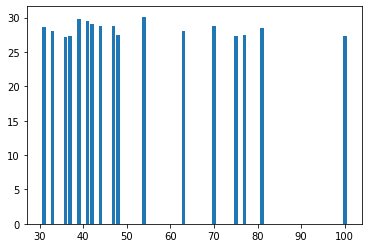

In [340]:
plt.bar(mean_age_team_sort['Score'], mean_age_team_sort['age'])
plt.show()